In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import statsmodels.api as sm
import sklearn
import os  

In [5]:
os.getcwd()

'c:\\Users\\mina\\Desktop\\서울대\\jupyter파일\\statistics\\실습_TA'

In [11]:
reg = pd.read_csv('data/Ecommerce Customers')
reg

# sns.jointplot(reg['Time On App'],reg[''])

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


C:\Users\mina\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


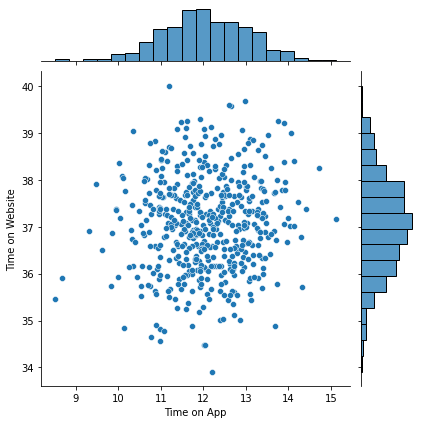

In [13]:
sns.jointplot(reg['Time on App'],reg['Time on Website'])

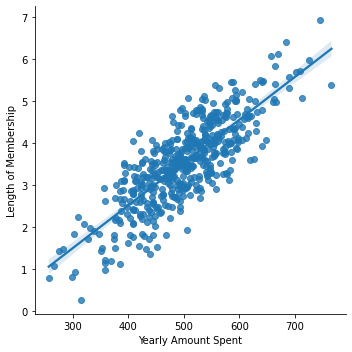

In [14]:
sns.lmplot(x='Yearly Amount Spent',y = 'Length of Membership', data=reg) #scatter #heatmap - 상관계수

In [15]:
#단순회귀분석Simple linear Regression
X = reg['Time on App']
y = reg['Yearly Amount Spent']
X_cons = sm.add_constant(X) #상수항 추가??
#ols사용
model = sm.OLS(y,X_cons).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.249
Model:                             OLS   Adj. R-squared:                  0.248
Method:                  Least Squares   F-statistic:                     165.4
Date:                 Fri, 14 Jan 2022   Prob (F-statistic):           6.91e-33
Time:                         17:10:43   Log-Likelihood:                -2824.0
No. Observations:                  500   AIC:                             5652.
Df Residuals:                      498   BIC:                             5660.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          19.2093     37.457      0.513      0.608     -54.383      92.802
Time on App    39.8345      3.097     12.861      0.000      33.749      45.920
==============================================================================
Omnibus:                        4.532   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                5.385
Skew:                          -0.081   Prob(JB):                       0.0677
Kurtosis:                       3.482   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#Multiple Regression model 
X_2 = reg[['Time on App','Avg. Session Length','Time on Website']]
X_2_cons = sm.add_constant(X_2)
model2 = sm.OLS(y,X_2_cons).fit()
model2.summary() # r-square 가 높을수록 좋긴 하나 목적에 맞게 모델을 잘 만들어야한다. (여러 변수 넣어보면서 수치 보기.)
#추정법이 인과관계를 추정하기에 좋은가?다른변수의 관계가 있는지 또 확인해보고 등등

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.387
Model:                             OLS   Adj. R-squared:                  0.383
Method:                  Least Squares   F-statistic:                     104.2
Date:                 Fri, 14 Jan 2022   Prob (F-statistic):           2.55e-52
Time:                         17:10:45   Log-Likelihood:                -2773.5
No. Observations:                  500   AIC:                             5555.
Df Residuals:                      496   BIC:                             5572.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -872.7797    143.414     -6.086      0.000   -1154.553    -591.007
Time on App            40.8619      2.816     14.511      0.000      35.329      46.395
Avg. Session Length    29.4243      2.813     10.461      0.000      23.898      34.951
Time on Website        -2.5084      2.771     -0.905      0.366      -7.953       2.936
==============================================================================
Omnibus:                        3.016   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.852
Skew:                          -0.135   Prob(JB):                        0.240
Kurtosis:                       3.254   Cond. No.                     2.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [18]:
lm.fit(X_2,y)

LinearRegression()

In [19]:
LinearRegression(fit_intercept=True, normalize=False) #데이터 추정치 많은 왜곡이 될 수도 있음 그럴 땐 normalize=True/False
print(lm.coef_) 
print(lm.intercept_)
#목적에 맞게 두 개의 기법 중 선택. 
#큰 데이터 전처리 시 python 사용
#classical stata/r 


[40.86193773 29.42434075 -2.50840821]
-872.779676786043


In [ ]:
# 알맞는 모형 찾기가 더 중요하기에 통계적 검증이나 이런 것 보단 모형 만들기 